# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
- Mouse ID: o331 has he highest tumor volumn
- The test consisted of 2% more Male mice than Female mice. Total percentage split was 51% Male and 49% Female
- Ramicane seemed from the data to have the best chance to reduce the tumor volumn. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()

#print number of mice
print(f"Number of mice: {len(combined_data['Mouse ID'].unique())}")


Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()

#print number of mice
print(f"Number of mice: {len(clean_data['Mouse ID'].unique())}")


Number of mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


#group by drug regimen
drug_regimen = clean_data.groupby('Drug Regimen')

#calculate mean, median, variance, standard deviation, and SEM of the tumor volume
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
variance = drug_regimen['Tumor Volume (mm3)'].var()
standard_deviation = drug_regimen['Tumor Volume (mm3)'].std()
sem = drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_table 


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
#Find the mouse with the hightest tumor volume
clean_data.loc[clean_data['Tumor Volume (mm3)'] == clean_data['Tumor Volume (mm3)'].max()]
#Print the mouse ID
print(f"Mouse ID: {clean_data.loc[clean_data['Tumor Volume (mm3)'] == clean_data['Tumor Volume (mm3)'].max(), 'Mouse ID'].values[0]}")


Mouse ID: o331


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

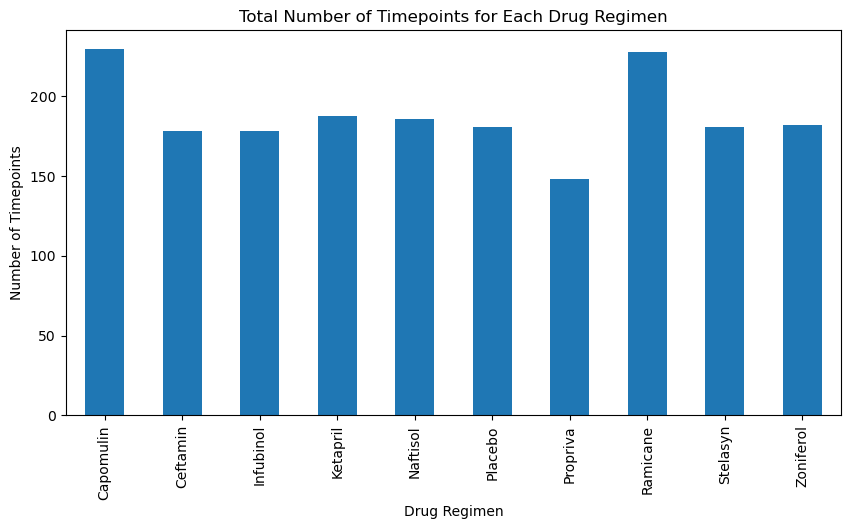

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

#group by drug regimen
drug_regimen = clean_data.groupby('Drug Regimen')

#count number of timepoints for each drug regimen
timepoints = drug_regimen['Timepoint'].count()

#plot bar chart
timepoints.plot(kind="bar", figsize=(10,5))

#set title and labels
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()





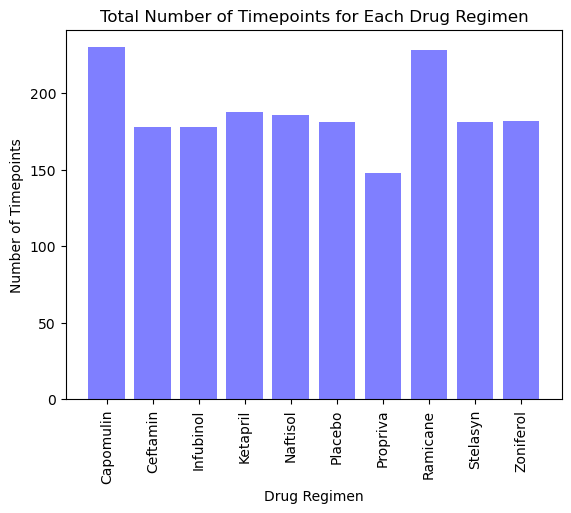

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#group by drug regimen
drug_regimen = clean_data.groupby('Drug Regimen')

#count number of timepoints for each drug regimen
timepoints = drug_regimen['Timepoint'].count()

#plot bar chart
plt.bar(timepoints.index.values, timepoints.values, color='b', alpha=0.5, align="center")

#set title and labels
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

#Format x-axis
plt.xticks(rotation=90)

plt.show()
plt.tight_layout()



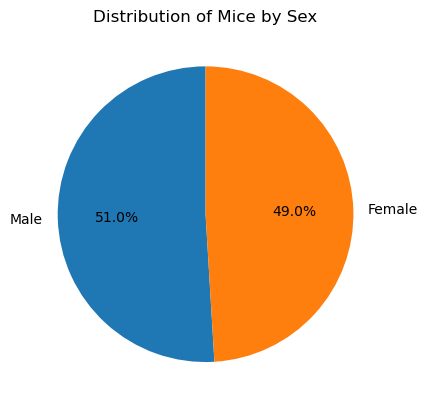

In [11]:
#generate a pie plot showing the distribution of female versus male mice using Pandas
# group data by sex
sex_counts = clean_data["Sex"].value_counts()

# create pie chart
sex_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)

# add title and labels
plt.title("Distribution of Mice by Sex")
plt.ylabel("")
plt.show()





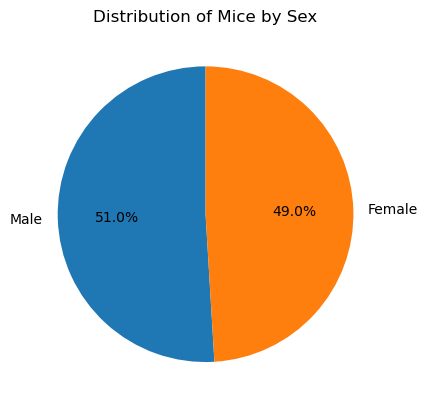

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# group data by sex
sex_counts = clean_data["Sex"].value_counts()

# create pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", startangle=90)

# add title
plt.title("Distribution of Mice by Sex")

# display plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# create a list of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# filter the data for the four treatments
treatment_data = clean_data[clean_data['Drug Regimen'].isin(treatments)]

# get the maximum timepoint for each mouse
max_timepoint = treatment_data.groupby('Mouse ID')['Timepoint'].max()

# merge the maximum timepoint with the original data to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, treatment_data, on=['Mouse ID', 'Timepoint'])

# select only the columns we need (Mouse ID, Drug Regimen, and Tumor Volume)
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume.head()



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


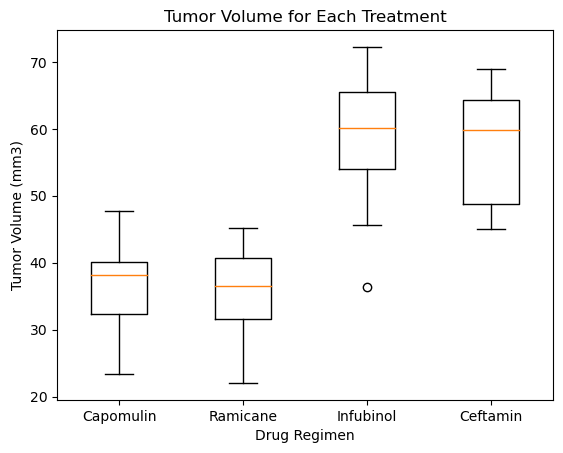

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# add labels
plt.boxplot(tumor_vol_data, labels=treatments)

# add title and labels
plt.title("Tumor Volume for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

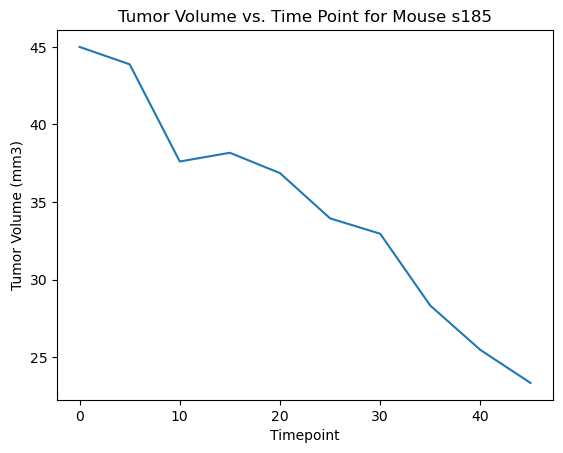

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# get data for a mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# get data for a specific mouse
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']

# plot line chart
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# add title and labels
plt.title("Tumor Volume vs. Time Point for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

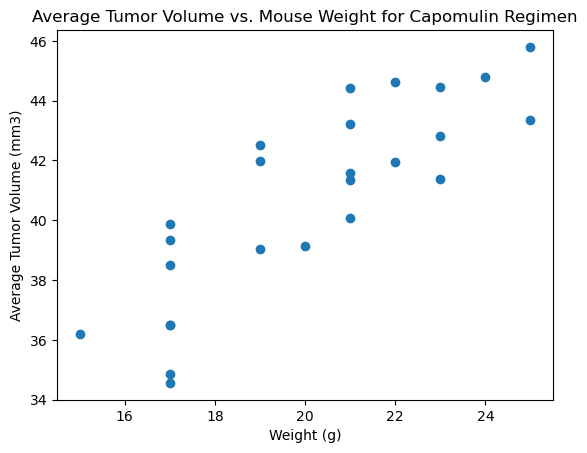

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# get data for the Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# group by mouse ID
capomulin_group = capomulin_data.groupby('Mouse ID')

# calculate the average tumor volume
avg_tumor_vol = capomulin_group['Tumor Volume (mm3)'].mean()

# calculate the average weight
avg_weight = capomulin_group['Weight (g)'].mean()

# plot scatter plot
plt.scatter(avg_weight, avg_tumor_vol)

# add title and labels
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


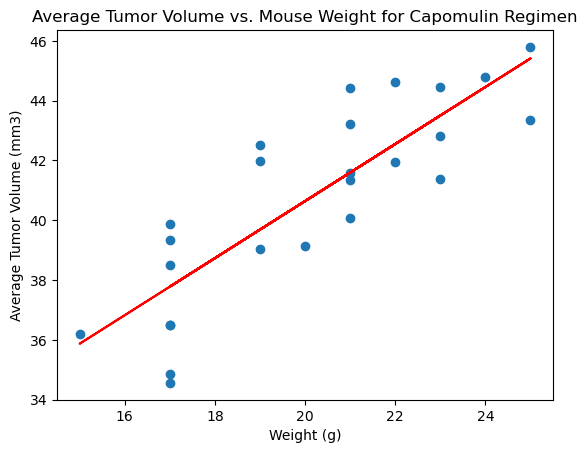

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# get data for the Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# group by mouse ID
capomulin_group = capomulin_data.groupby('Mouse ID')

# calculate the average tumor volume
avg_tumor_vol = capomulin_group['Tumor Volume (mm3)'].mean()

# calculate the average weight
avg_weight = capomulin_group['Weight (g)'].mean()

# calculate the correlation coefficient
correlation = st.pearsonr(avg_weight, avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor_vol)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(avg_weight, avg_tumor_vol)

# plot linear regression model
plt.plot(avg_weight,regress_values,"r-")

# add title and labels
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
